In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('emissions_by_country.csv')

In [71]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df.describe()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,62307.000000,62381.000000,63104.000000,63104.000000,21797.000000,21774.000000,21717.000000,20488.000000,21338.000000,2685.000000,19392.000000
mean,1888.267097,73.683456,49.497813,39026.539015,127.387271,153.480038,125.162671,62.599364,56.074327,849.395127,121.565443
std,122.651184,843.930381,17.292092,10975.539432,677.951392,670.830891,514.391435,353.918064,337.629062,1055.250022,489.339877
min,1003.000000,0.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1816.000000,0.000000,35.000000,29498.750000,0.000000,0.113584,0.000000,0.000000,0.000000,1.016000,0.231702
50%,1886.000000,0.000000,49.000000,39067.000000,0.344416,1.344688,0.000000,0.032709,0.000000,9.237945,1.601436
75%,1955.000000,0.659520,64.000000,48544.250000,8.500480,13.008908,1.683510,0.725079,0.000000,1812.000000,6.305100
max,2999.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2982.000000,2994.000000,2999.000000,2997.000000


In [73]:
print(df.describe())

               Year         Total   Temperature  GDP Per Capita (USD)  \
count  62307.000000  62381.000000  63104.000000          63104.000000   
mean    1888.267097     73.683456     49.497813          39026.539015   
std      122.651184    843.930381     17.292092          10975.539432   
min     1003.000000      0.000000     20.000000          20000.000000   
25%     1816.000000      0.000000     35.000000          29498.750000   
50%     1886.000000      0.000000     49.000000          39067.000000   
75%     1955.000000      0.659520     64.000000          48544.250000   
max     2999.000000  37123.850352     79.000000          57999.000000   

               Coal           Oil           Gas        Cement       Flaring  \
count  21797.000000  21774.000000  21717.000000  20488.000000  21338.000000   
mean     127.387271    153.480038    125.162671     62.599364     56.074327   
std      677.951392    670.830891    514.391435    353.918064    337.629062   
min        0.000000      0

In [74]:
print(df.shape)

(63104, 13)


In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               61087 non-null  object 
 1   ISO 3166-1 alpha-3    59483 non-null  object 
 2   Year                  62307 non-null  float64
 3   Total                 62381 non-null  float64
 4   Temperature           63104 non-null  int64  
 5   GDP Per Capita (USD)  63104 non-null  int64  
 6   Coal                  21797 non-null  float64
 7   Oil                   21774 non-null  float64
 8   Gas                   21717 non-null  float64
 9   Cement                20488 non-null  float64
 10  Flaring               21338 non-null  float64
 11  Other                 2685 non-null   float64
 12  Per Capita            19392 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ MB
None


In [76]:
print(df.isnull().sum())

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64


In [77]:
categorical = df.select_dtypes(include=['object']).columns

In [78]:
numerical = df.select_dtypes(include=['int64','float64']).columns

In [79]:
print(f"Categorical columns: {categorical}")
print(f"Numerical columns: {numerical}")

Categorical columns: Index(['Country', 'ISO 3166-1 alpha-3'], dtype='object')
Numerical columns: Index(['Year', 'Total', 'Temperature', 'GDP Per Capita (USD)', 'Coal', 'Oil',
       'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')


In [80]:
print("Unique values in each column ",df.nunique())

Unique values in each column  Country                   638
ISO 3166-1 alpha-3        449
Year                     1243
Total                   16471
Temperature                60
GDP Per Capita (USD)    30779
Coal                    11101
Oil                     12096
Gas                      7053
Cement                   9253
Flaring                  3974
Other                    2327
Per Capita              17319
dtype: int64


Here we can observe that Other column is most likely null and can be ignored. But other columns hold relevant information and can not be eliminated nor can be imputed, since it would not be in line with real world scenario. 

In [81]:
df = df.drop('Other', axis=1)

In [82]:
print(df.columns)

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Temperature',
       'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')


In [83]:
# with this we eliminate country and iso reference null values 
df_1 = df.loc[df['Country'].notnull() & df['ISO 3166-1 alpha-3'].notnull()]

In [84]:
print(df_1.isnull().sum())

Country                     0
ISO 3166-1 alpha-3          0
Year                      318
Total                     399
Temperature                 0
GDP Per Capita (USD)        0
Coal                    37667
Oil                     37710
Gas                     37803
Cement                  38729
Flaring                 37969
Per Capita              40467
dtype: int64


In [86]:
numerical = df.select_dtypes(include=['int64','float64']).columns
print(numerical)

Index(['Year', 'Total', 'Temperature', 'GDP Per Capita (USD)', 'Coal', 'Oil',
       'Gas', 'Cement', 'Flaring', 'Per Capita'],
      dtype='object')


### We impute the data. Here we can observe that the dataset is highly 

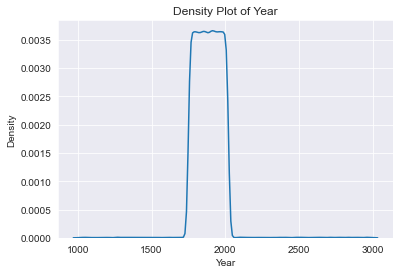

column name Year


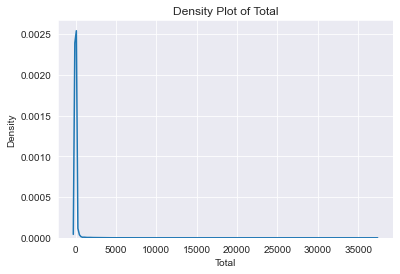

column name Total


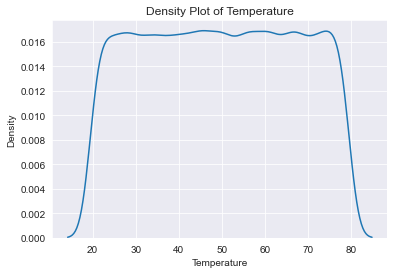

column name Temperature


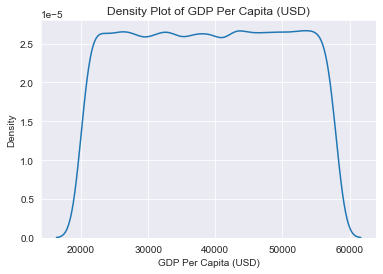

column name GDP Per Capita (USD)


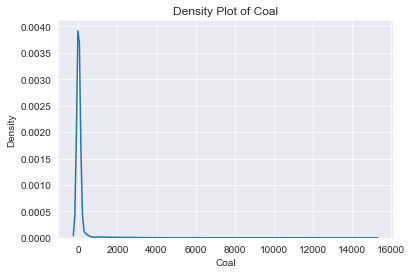

column name Coal


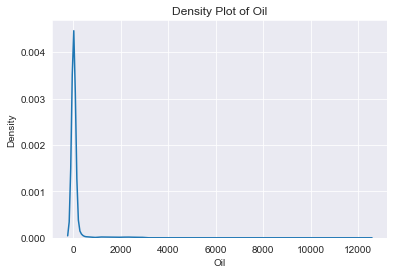

column name Oil


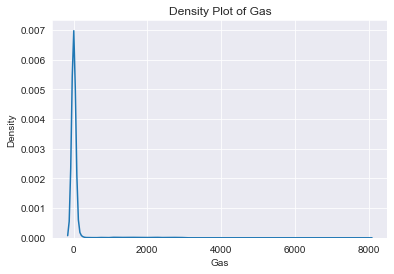

column name Gas


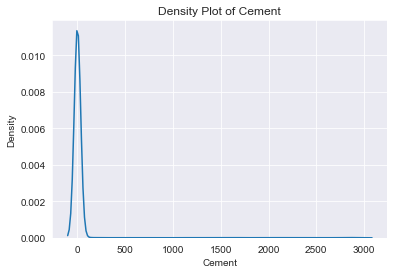

column name Cement


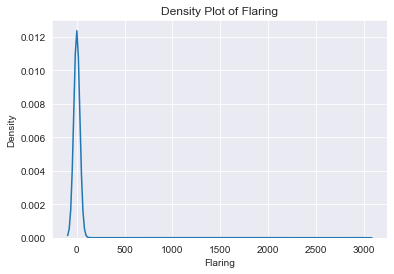

column name Flaring


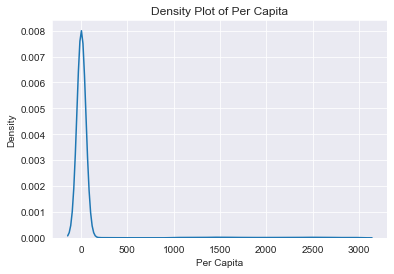

column name Per Capita


In [87]:
for i in numerical:
    sns.kdeplot(df_1[i])
    plt.title(f'Density Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()
    print(f'column name {i}')


### We know that if the column data density is normal distribution then we need to take the mean. Whereas if the data is skewed then we need to take median or mode. Therefore, with the distribution graph we will take the decision. 

In [88]:
normal_distribution_columns = ['Temperature','Year', 'GDP Per Capita (USD)']
skewed_distributed_columns = list(set(numerical).difference(set(normal_distribution_columns))) 

print(f'skewed_distributed_columns:{skewed_distributed_columns}')
print(f'normal_distribution_columns:{normal_distribution_columns}')

skewed_distributed_columns:['Gas', 'Oil', 'Total', 'Cement', 'Flaring', 'Per Capita', 'Coal']
normal_distribution_columns:['Temperature', 'Year', 'GDP Per Capita (USD)']


In [89]:
for i in normal_distribution_columns:
        mean = df_1[i].mean()
        df_1[i].fillna(math.ceil(mean),inplace=True)

for i in skewed_distributed_columns:
        median_value = df_1[i].median()
        df_1[i].fillna(median_value,inplace=True)

In [90]:
print(df_1.isnull().sum())

Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Per Capita              0
dtype: int64


In [91]:
df_1.to_csv('df-cleaning-itr-1.csv', index=False)

In [92]:
clean_df = df_1

In [93]:
print(clean_df.shape)

(58210, 12)


In [94]:
clean_df = clean_df.rename({'ISO 3166-1 alpha-3': 'ISO'}, axis='columns')

In [95]:
clean_df.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,0.0,1.527148
1,Afghanistan,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,0.0,1.527148
2,Afghanistan,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,0.0,1.527148
3,Afghanistan,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,0.0,1.527148
4,Afghanistan,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,0.0,1.527148


In [96]:
clean_df['Country']=clean_df['Country'].str.upper()

In [97]:
clean_df['ISO'] = clean_df['ISO'].str.upper()

In [98]:
clean_df.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,0.0,1.527148
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,0.0,1.527148
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,0.0,1.527148
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,0.0,1.527148
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,0.0,1.527148


EDA Graphical exploration 

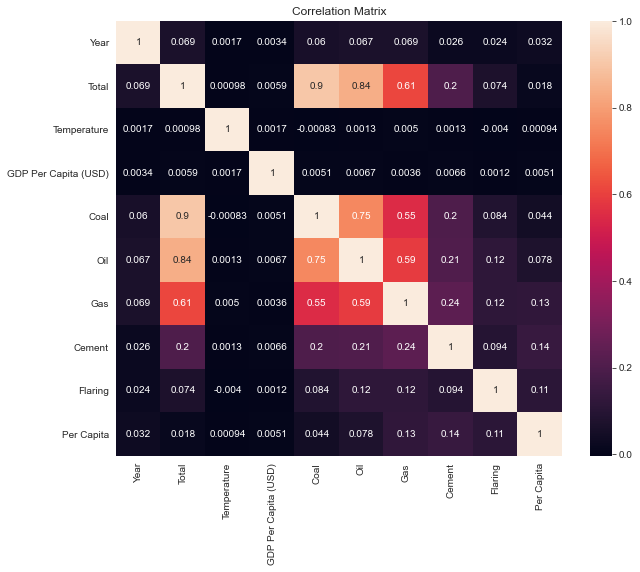

In [99]:
numeric_df = clean_df.select_dtypes(include=['float64','int64'])
matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### We can observe that with the data, we dont see much of a correlation between temperature and the natural resources production. This can mean a multitude of things, including questioning the accuracy of the data. But the interesting part is the correlation between per capita and the natural resources. Which can shed light on how much consumption of natural resources increase as per increase in per capita. We low key know that energy consumption increases with per capita increase, so we can select Per capita as a target variable and find this positive association is true or not. 

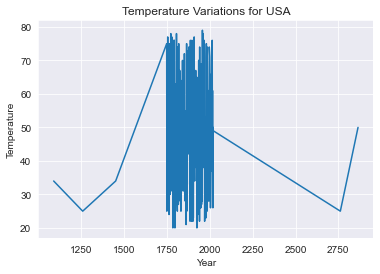

In [100]:
country='USA'
temp_to_year_df = clean_df[['Country','Year','Temperature']]
country_data = temp_to_year_df[temp_to_year_df['Country'] == country]
sns.lineplot(x='Year', y='Temperature', data=country_data)
plt.title(f"Temperature Variations for {country}")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

This particular analysis shows further gap in the data. There exists data pointing to future as well. We will delete all these entries and put it to clean_df

In [101]:
clean_df = clean_df.loc[clean_df['Year'] < 2024]

This operation should eliminate undesired future dates.

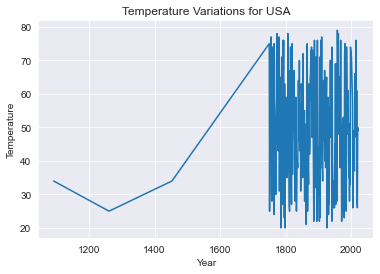

In [102]:
country='USA'
temp_to_year_df = clean_df[['Country','Year','Temperature']]
country_data = temp_to_year_df[temp_to_year_df['Country'] == country]
sns.lineplot(x='Year', y='Temperature', data=country_data)
plt.title(f"Temperature Variations for {country}")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

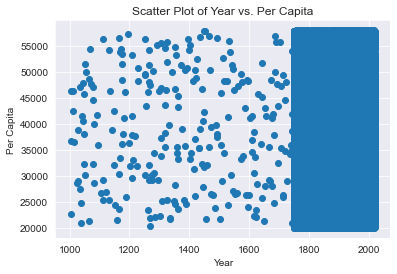

In [103]:
plt.scatter(clean_df['Year'], clean_df['GDP Per Capita (USD)'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Scatter Plot of Year vs. Per Capita')
plt.grid(True)
plt.show()

In [105]:
clean_df = clean_df.loc[clean_df['Year'] != 0]


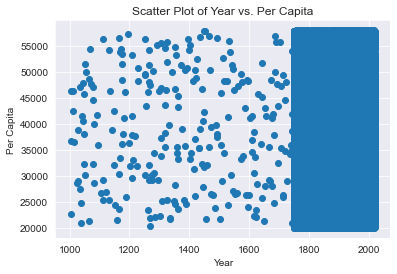

In [106]:
plt.scatter(clean_df['Year'], clean_df['GDP Per Capita (USD)'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Scatter Plot of Year vs. Per Capita')
plt.grid(True)
plt.show()

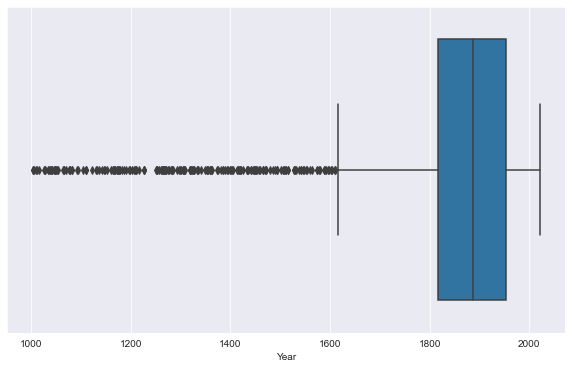

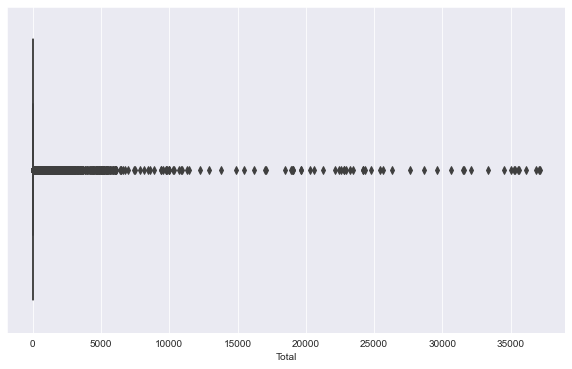

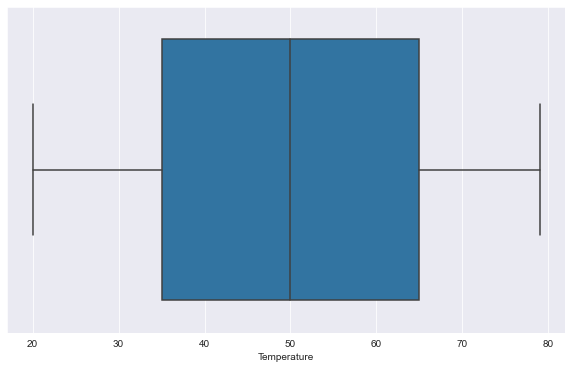

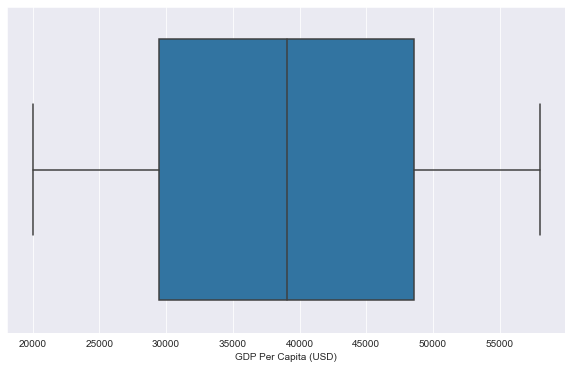

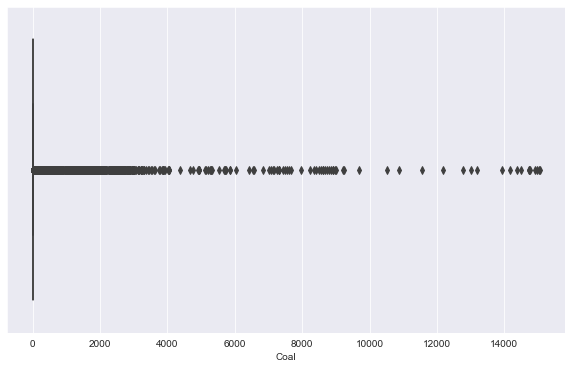

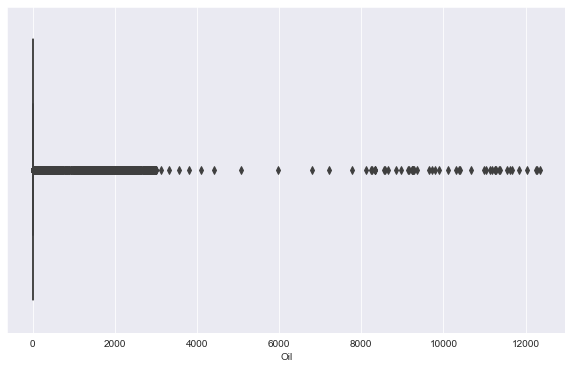

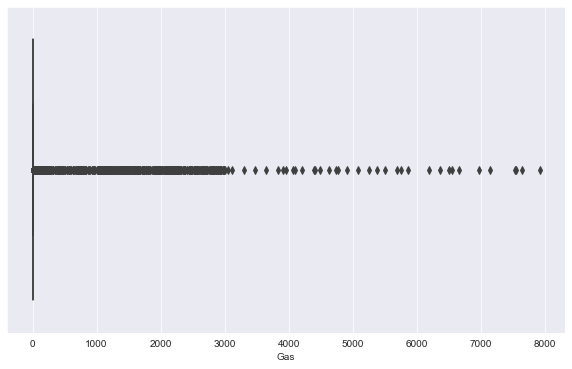

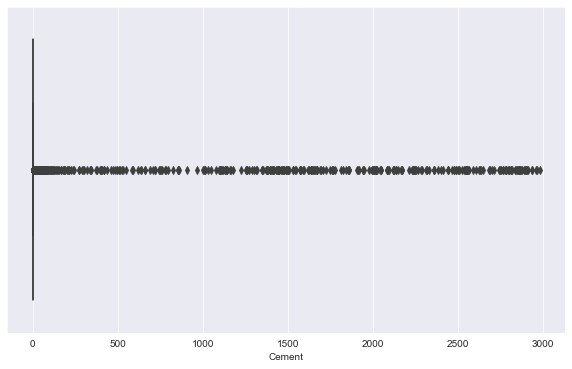

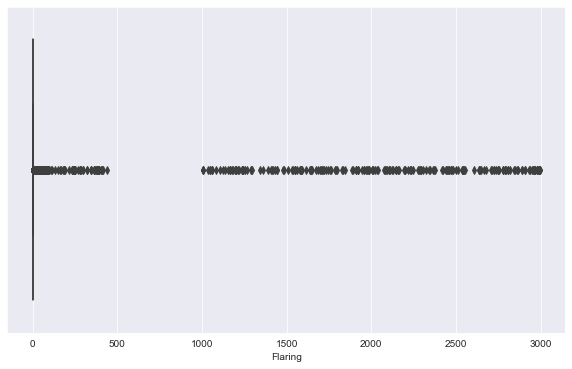

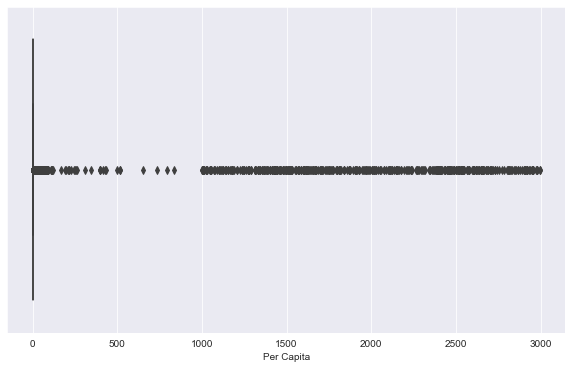

In [107]:
for c in clean_df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=clean_df[c])
    plt.show()

In [108]:
df_zscore = clean_df.copy()
for i in df.select_dtypes(include=['int64','float64']).columns:
  z_score_column = i + '_z-score'
  df_zscore[z_score_column] = (df[i] - df[i].mean()) / df[i].std()

In [109]:
df_zscore.head()


,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,...,Year_z-score,Total_z-score,Temperature_z-score,GDP Per Capita (USD)_z-score,Coal_z-score,Oil_z-score,Gas_z-score,Cement_z-score,Flaring_z-score,Per Capita_z-score
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,...,-1.127320,-0.08731,1.185639,1.496825,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,...,-1.119167,-0.08731,0.954320,0.553454,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,...,-1.111013,-0.08731,1.301299,-0.650131,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,...,-1.102860,-0.08731,-0.317938,-0.324407,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,...,-1.094707,-0.08731,-1.648026,-0.526584,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df_zscore.shape

(57888, 22)

In [111]:
capture_outlier_column = []
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3 ]
    print(f"Number of outliers in {i}: {len(outliers)}")
    if len(outliers) > 0:
        capture_outlier_column.append(i)

Number of outliers in Year_z-score: 0
Number of outliers in Total_z-score: 240
Number of outliers in Temperature_z-score: 0
Number of outliers in GDP Per Capita (USD)_z-score: 0
Number of outliers in Coal_z-score: 220
Number of outliers in Oil_z-score: 246
Number of outliers in Gas_z-score: 284
Number of outliers in Cement_z-score: 213
Number of outliers in Flaring_z-score: 195
Number of outliers in Per Capita_z-score: 290


In [112]:
capture_outlier_column

['Total_z-score',
 'Coal_z-score',
 'Oil_z-score',
 'Gas_z-score',
 'Cement_z-score',
 'Flaring_z-score',
 'Per Capita_z-score']

In [113]:
for i in capture_outlier_column:
    df_zscore = df_zscore.drop(df_zscore.loc[df_zscore[i] > 3].index)

In [114]:
df_zscore.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,...,Year_z-score,Total_z-score,Temperature_z-score,GDP Per Capita (USD)_z-score,Coal_z-score,Oil_z-score,Gas_z-score,Cement_z-score,Flaring_z-score,Per Capita_z-score
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,...,-1.127320,-0.08731,1.185639,1.496825,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,...,-1.119167,-0.08731,0.954320,0.553454,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,...,-1.111013,-0.08731,1.301299,-0.650131,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,...,-1.102860,-0.08731,-0.317938,-0.324407,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,...,-1.094707,-0.08731,-1.648026,-0.526584,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df_zscore = df_zscore.drop(columns=[col for col in df_zscore.columns if col.endswith('_z-score')])


In [116]:
df_zscore.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,0.0,1.527148
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,0.0,1.527148
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,0.0,1.527148
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,0.0,1.527148
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,0.0,1.527148


In [117]:
df_zscore.shape

(56742, 12)

### We can observe that the entries have changed and we have eliminated outliers which are more than 3 standard deviations away. New df row count = 56547 , previous count = 57570

In [118]:
clean_df = df_zscore.copy()

In [119]:
sublist = ['Coal','Oil','Gas','Cement','Flaring']

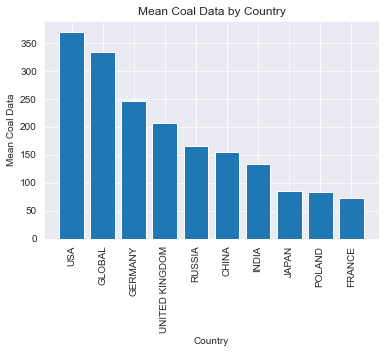

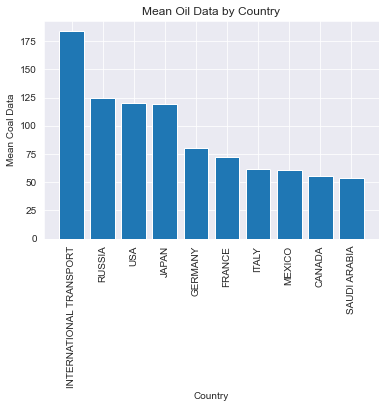

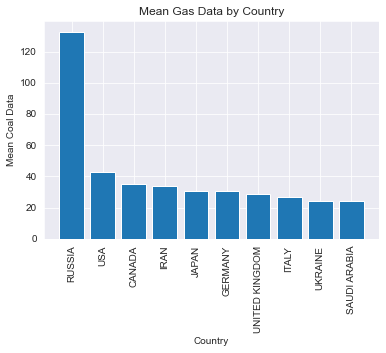

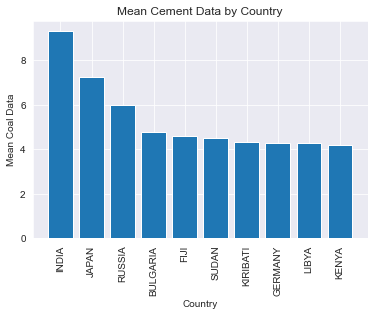

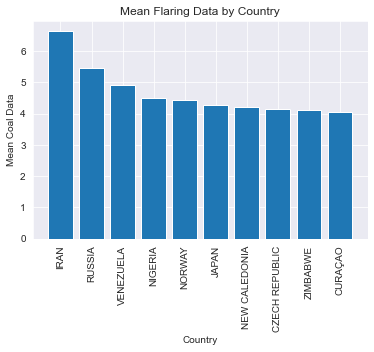

In [122]:
## Top 10 Mean of all sub list columns 
for col in sublist:
    mean_coal_data = clean_df.groupby('Country')[col].mean()
    top10Largest = mean_coal_data.nlargest(10)
    plt.bar(top10Largest.index, top10Largest.values)
    plt.xlabel('Country')
    plt.ylabel('Mean Coal Data')
    plt.title(f'Mean {col} Data by Country')
    plt.xticks(rotation=90)
    plt.show()  

In [124]:
df_encoded = pd.get_dummies(clean_df, columns=['Country', 'ISO'])

In [125]:
df_encoded.to_csv('df-string-encoded.csv', index=False)

In [126]:
df_encoded.head()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita,...,ISO_VNM,ISO_VUT,ISO_WLD,ISO_WLF,ISO_WSM,ISO_XIT,ISO_YEM,ISO_ZAF,ISO_ZMB,ISO_ZWE
0,1750.0,0.0,70,55455,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,0,0,0,0,0,0,0,0,0,0
1,1751.0,0.0,66,45101,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,0,0,0,0,0,0,0,0,0,0
2,1752.0,0.0,72,31891,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,0,0,0,0,0,0,0,0,0,0
3,1753.0,0.0,44,35466,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,0,0,0,0,0,0,0,0,0,0
4,1754.0,0.0,21,33247,0.322126,1.179808,0.0,0.028772,0.0,1.527148,...,0,0,0,0,0,0,0,0,0,0


In [127]:
clean_df.columns[5:]

Index(['GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')

In [128]:
non_categorical_cols = clean_df.columns[5:]

In [129]:
min_values = df_encoded[non_categorical_cols].min()
max_values = df_encoded[non_categorical_cols].max()

In [130]:
normalized_df = (df_encoded[non_categorical_cols] - min_values) / (max_values - min_values)

In [131]:
normalized_df.head()

,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,0.933051,0.00015,0.000547,0.0,0.000026,0.0,0.000962
1,0.660570,0.00015,0.000547,0.0,0.000026,0.0,0.000962
2,0.312929,0.00015,0.000547,0.0,0.000026,0.0,0.000962
3,0.407011,0.00015,0.000547,0.0,0.000026,0.0,0.000962
4,0.348614,0.00015,0.000547,0.0,0.000026,0.0,0.000962


In [132]:
pre_processed_df = pd.concat([normalized_df,df_encoded.iloc[:,5:]], axis=1)

In [133]:
pre_processed_df.head()

,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita,Oil,Gas,Cement,...,ISO_VNM,ISO_VUT,ISO_WLD,ISO_WLF,ISO_WSM,ISO_XIT,ISO_YEM,ISO_ZAF,ISO_ZMB,ISO_ZWE
0,0.933051,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,0,0,0,0,0,0,0,0,0,0
1,0.660570,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,0,0,0,0,0,0,0,0,0,0
2,0.312929,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,0,0,0,0,0,0,0,0,0,0
3,0.407011,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,0,0,0,0,0,0,0,0,0,0
4,0.348614,0.00015,0.000547,0.0,0.000026,0.0,0.000962,1.179808,0.0,0.028772,...,0,0,0,0,0,0,0,0,0,0


In [134]:
pre_processed_df.to_csv('pre_processed_df.csv', index=False)